In [36]:
# Importing necessary libraries for data manipulation, model building, and evaluation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Ensure this is imported for plotting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# Printing success message to confirm all libraries have been imported without errors
print("Libraries imported successfully.")


Libraries imported successfully.


In [37]:
# Importing the pandas library, which provides data manipulation and analysis functions
import pandas as pd

# Loading the dataset from the specified file path into a DataFrame object called 'data'
data = pd.read_csv(r"C:\Users\teena\OneDrive\Desktop\healthcare-dataset-stroke-data.csv")
# Printing a confirmation message indicating the dataset is loaded successfully
print("Dataset loaded successfully.")
# Displaying the first few rows of the dataset using the head() function
print(data.head())


Dataset loaded successfully.
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [38]:
# Selecting only the relevant features from the dataset for analysis
# Keeping features that are relevant to predicting stroke, based on prior research or domain knowledge
data = data[['age', 'gender', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]

# Displaying a message to indicate the selection of relevant features has been done
print("Selected Relevant Features")

# Displaying the first few rows of the selected data to verify the selected features
data.head()


Selected Relevant Features


,age,gender,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,Male,0,1,228.69,36.6,formerly smoked,1
1,61.0,Female,0,0,202.21,NaN,never smoked,1
2,80.0,Male,0,1,105.92,32.5,never smoked,1
3,49.0,Female,0,0,171.23,34.4,smokes,1
4,79.0,Female,1,0,174.12,24.0,never smoked,1


In [39]:
# Creating a copy of the original dataset to prevent modifying the original data directly
data = data.copy()

# Filling missing values in the 'bmi' column with the mean of the 'bmi' column
# This is using the 'fillna()' method to replace NaN values with the mean
# Setting inplace=False to avoid potential warnings by modifying the data in a copied version
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())  

# Checking if missing values in the 'bmi' column have been successfully handled
# Using 'isnull().sum()' to verify that there are no remaining NaN values in 'bmi'
print("Missing values in 'bmi' column handled successfully.")
print(data['bmi'].isnull().sum())


Missing values in 'bmi' column handled successfully.
0


In [40]:
# Encoding the 'gender' column by mapping categorical values to numeric values
# Mapping 'Female' to 0 and 'Male' to 1
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})

# Encoding the 'smoking_status' column by mapping categorical values to numeric values
data['smoking_status'] = data['smoking_status'].map({
    'never smoked': 0,
    'smokes': 1,
    'formerly smoked': 2
})

# Printing a message to confirm that the encoding of 'gender' and 'smoking_status' is complete
print("Encoded Categorical Variables 'gender' and 'smoking_status'")

# Displaying the first few rows of the dataset to verify the changes
data.head()


Encoded Categorical Variables 'gender' and 'smoking_status'


,age,gender,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,1.0,0,1,228.69,36.600000,2.0,1
1,61.0,0.0,0,0,202.21,28.893237,0.0,1
2,80.0,1.0,0,1,105.92,32.500000,0.0,1
3,49.0,0.0,0,0,171.23,34.400000,1.0,1
4,79.0,0.0,1,0,174.12,24.000000,0.0,1


In [41]:
# Defining features and target
X = data.drop('stroke', axis=1)
y = data['stroke']
print("Separated features and target variable.")
print(X.head())
print(y.head())


Separated features and target variable.
    age  gender  hypertension  heart_disease  avg_glucose_level        bmi  \
0  67.0     1.0             0              1             228.69  36.600000   
1  61.0     0.0             0              0             202.21  28.893237   
2  80.0     1.0             0              1             105.92  32.500000   
3  49.0     0.0             0              0             171.23  34.400000   
4  79.0     0.0             1              0             174.12  24.000000   

   smoking_status  
0             2.0  
1             0.0  
2             0.0  
3             1.0  
4             0.0  
0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


In [42]:
# Importing train_test_split function from sklearn library to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets, where X represents features and y represents target variable
# Setting test_size to 0.2, which means 20% of the data will be used for testing, and 80% will be used for training
# Setting random_state to 42 to ensure reproducibility of the split; using the same seed will give the same split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing a message indicating that the data has been split into training and testing sets
print("Split Data into Training and Testing Sets")

# Printing the shape (number of samples and features) of the training set to show its size
print("Training Set Size:", X_train.shape)

# Printing the shape (number of samples and features) of the testing set to show its size
print("Testing Set Size:", X_test.shape)


Split Data into Training and Testing Sets
Training Set Size: (4088, 7)
Testing Set Size: (1022, 7)


In [43]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# To Ensure X_train and X_test have been split before this point

# Step 1: Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)  # Scale testing data
print("Data scaled successfully.")

# Step 2: Checking for NaN values in scaled data
print("Checking for NaN values in scaled training data:")

# Summing up the count of NaN values for each column in X_train_scaled
# and storing it in 'nan_columns' to identify columns with NaN issues
nan_columns = np.isnan(X_train_scaled).sum(axis=0)
print("NaN counts per column:", nan_columns)

# Step 3: Replacing any NaN values with column means
if nan_columns.any():  # Check if there are any NaN values
    X_train_scaled = np.where(np.isnan(X_train_scaled), np.nanmean(X_train_scaled, axis=0), X_train_scaled)
    X_test_scaled = np.where(np.isnan(X_test_scaled), np.nanmean(X_test_scaled, axis=0), X_test_scaled)
    print("Replaced NaN values with column means.")
else:
    print("No NaN values found in scaled data.")


Data scaled successfully.
Checking for NaN values in scaled training data:
NaN counts per column: [   0    0    0    0    0    0 1233]
Replaced NaN values with column means.


In [44]:
# Importing SMOTE from imbalanced-learn library to handle class imbalance
smote = SMOTE(random_state=42)  # Creating an instance of SMOTE with a fixed random state for reproducibility

# Applying SMOTE to the training data to balance the class distribution
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Printing a message to confirm that SMOTE has been successfully applied for class balancing
print("SMOTE applied for class balancing successfully.")

# Displaying the distribution of classes after SMOTE to verify balancing
print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())


SMOTE applied for class balancing successfully.
Class distribution after SMOTE:
 stroke
0    3901
1    3901
Name: count, dtype: int64


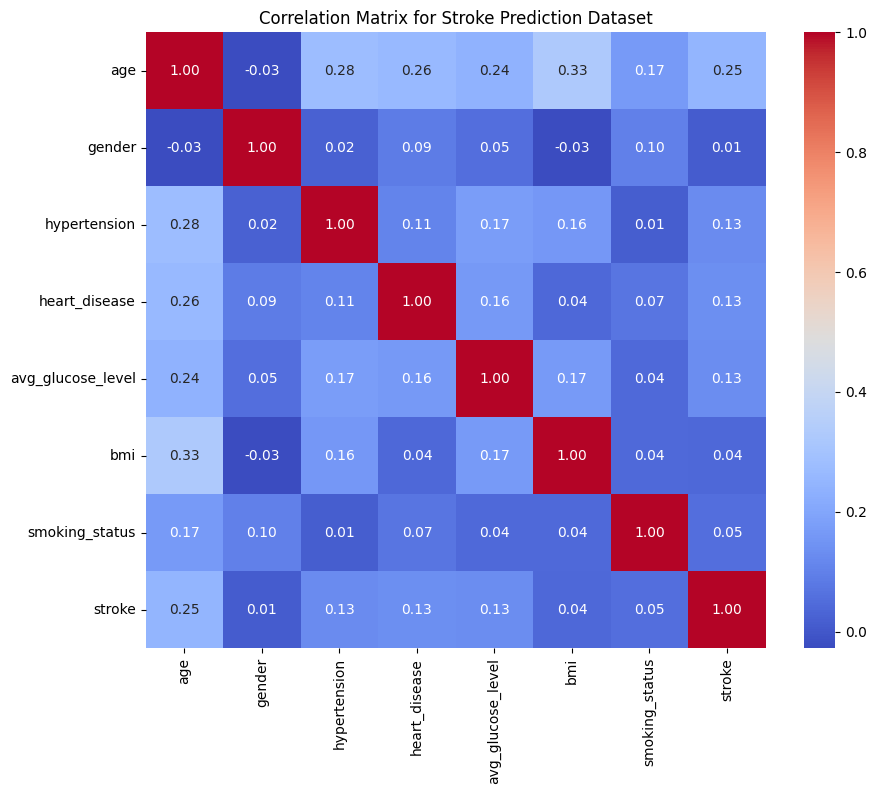

In [45]:
# Generating the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix for Stroke Prediction Dataset")
plt.show()


In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

# Setting the number of top features to select
# 'k' is set to the lesser of 16 or 20, to ensure it doesn't exceed the number of features available
k = min(16, data.shape[1] - 1)  # Adjusts k to the lesser of 16 or the number of features

# Creating an instance of SelectKBest for feature selection
# SelectKBest is using the f_classif function to score features based on their ANOVA F-value with the target
selector = SelectKBest(f_classif, k=k)

# Fitting the SelectKBest model on the resampled training data
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)

# Transforming the scaled testing data to only include the selected features
X_test_selected = selector.transform(X_test_scaled)

# Confirming the feature selection process
print("Top features selected successfully.")
# Printing the shape of the selected training features to verify the expected number of features
print("Selected training features shape:", X_train_selected.shape)
# Printing the shape of the selected testing features to confirm consistency with the training set
print("Selected testing features shape:", X_test_selected.shape)

Top features selected successfully.
Selected training features shape: (7802, 7)
Selected testing features shape: (1022, 7)


In [47]:
# Importing necessary libraries
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Defining classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'SVM (Linear)': SVC(kernel='linear', probability=True),
    'SVM (RBF)': SVC(kernel='rbf', probability=True),
    'SVM (Sigmoid)': SVC(kernel='sigmoid', probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(),
    
}

print("Classifiers defined successfully.")


Classifiers defined successfully.



KNN Classifier:
Accuracy: 0.8014
AUC: 0.6745631720430108
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       960
           1       0.12      0.37      0.18        62

    accuracy                           0.80      1022
   macro avg       0.54      0.60      0.54      1022
weighted avg       0.90      0.80      0.84      1022


MLP Classifier:
Accuracy: 0.8288
AUC: 0.7763608870967742
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.90       960
           1       0.16      0.42      0.23        62

    accuracy                           0.83      1022
   macro avg       0.56      0.64      0.57      1022
weighted avg       0.91      0.83      0.86      1022


Random Forest Classifier:
Accuracy: 0.8787
AUC: 0.7661542338709678
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92     

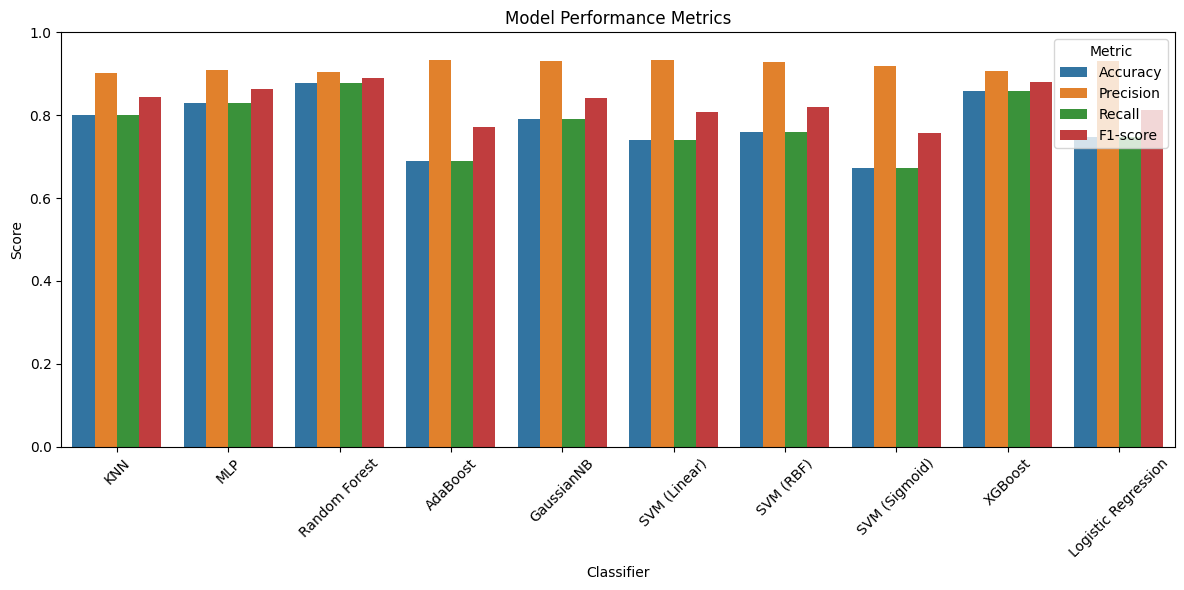

In [48]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining classifiers with adjustments
classifiers = {
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),  
    'GaussianNB': GaussianNB(),
    'SVM (Linear)': SVC(kernel='linear', probability=True),
    'SVM (RBF)': SVC(kernel='rbf', probability=True),
    'SVM (Sigmoid)': SVC(kernel='sigmoid', probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss'),  
    'Logistic Regression': LogisticRegression()
}

# Storing results
results = {
    "Classifier": [],
    "Accuracy": [],
    "AUC": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

# Training and evaluating classifiers
for name, clf in classifiers.items():
    clf.fit(X_train_selected, y_train_resampled)
    y_pred = clf.predict(X_test_selected)
    y_pred_proba = clf.predict_proba(X_test_selected)[:, 1] if hasattr(clf, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append results
    results["Classifier"].append(name)
    results["Accuracy"].append(accuracy)
    results["AUC"].append(auc)
    results["Precision"].append(report['weighted avg']['precision'])
    results["Recall"].append(report['weighted avg']['recall'])
    results["F1-score"].append(report['weighted avg']['f1-score'])
    
    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Converting results to DataFrame
summary_df = pd.DataFrame(results)

# Displaying summary
print("\nSummary of Classifier Results:")
print(summary_df)

# Melting DataFrame for seaborn compatibility
summary_melted = summary_df.melt(id_vars="Classifier", value_vars=["Accuracy", "Precision", "Recall", "F1-score"], 
                                 var_name="Metric", value_name="Score")

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_melted, x="Classifier", y="Score", hue="Metric")

# Adding plot labels and title
plt.title("Model Performance Metrics")
plt.xlabel("Classifier")
plt.ylabel("Score")
plt.ylim(0, 1)  # Score range from 0 to 1 for better visibility
plt.legend(title="Metric")

# Displaying the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
